In [2]:
import pandas as pd

wine = pd.read_csv("https://bit.ly/wine_csv_data")

In [3]:
data = wine[["alcohol", "sugar", "pH"]].to_numpy()
target = wine["class"].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [5]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [6]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


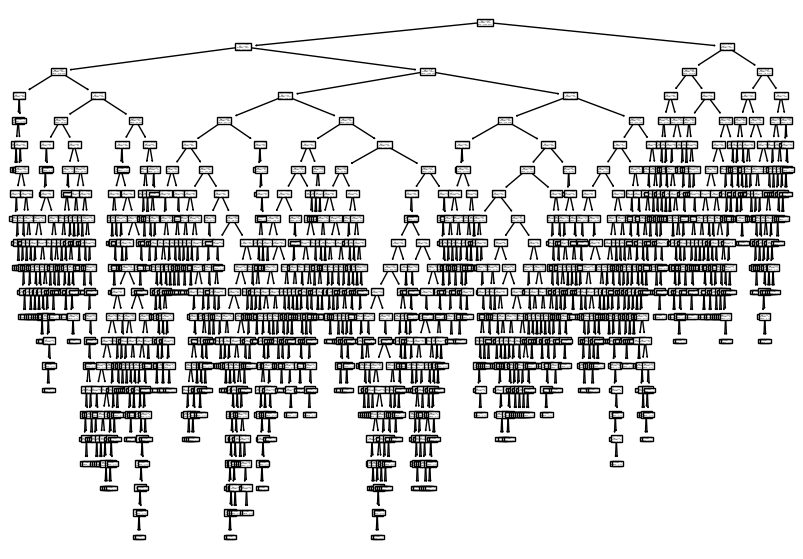

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

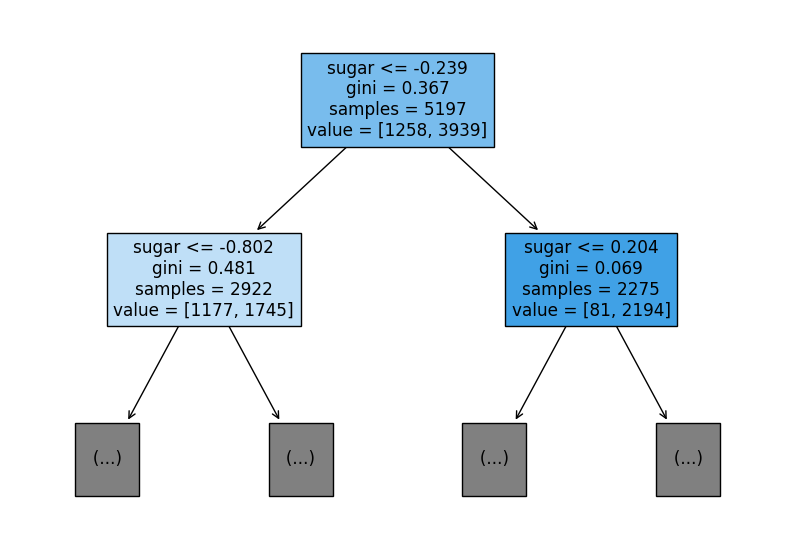

In [10]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=["alcohol", "sugar", "pH"])
plt.show()

In [11]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


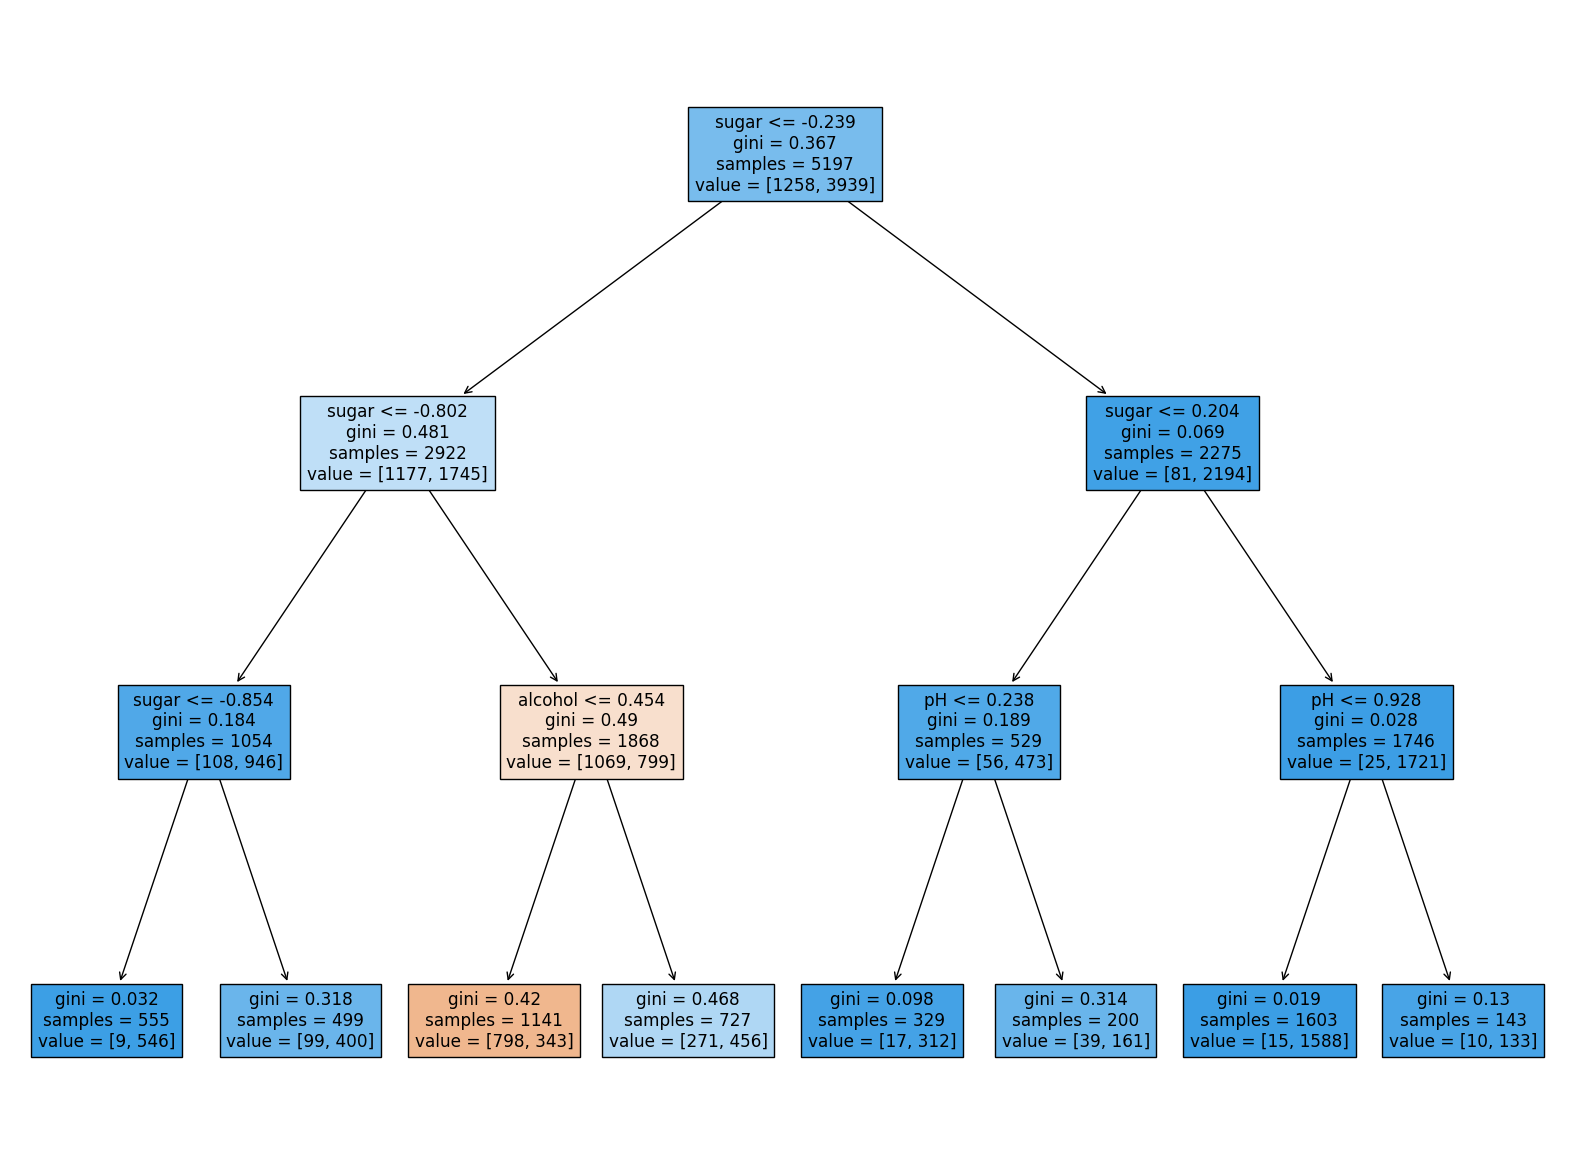

In [12]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=["alcohol", "sugar", "pH"])
plt.show()

In [14]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


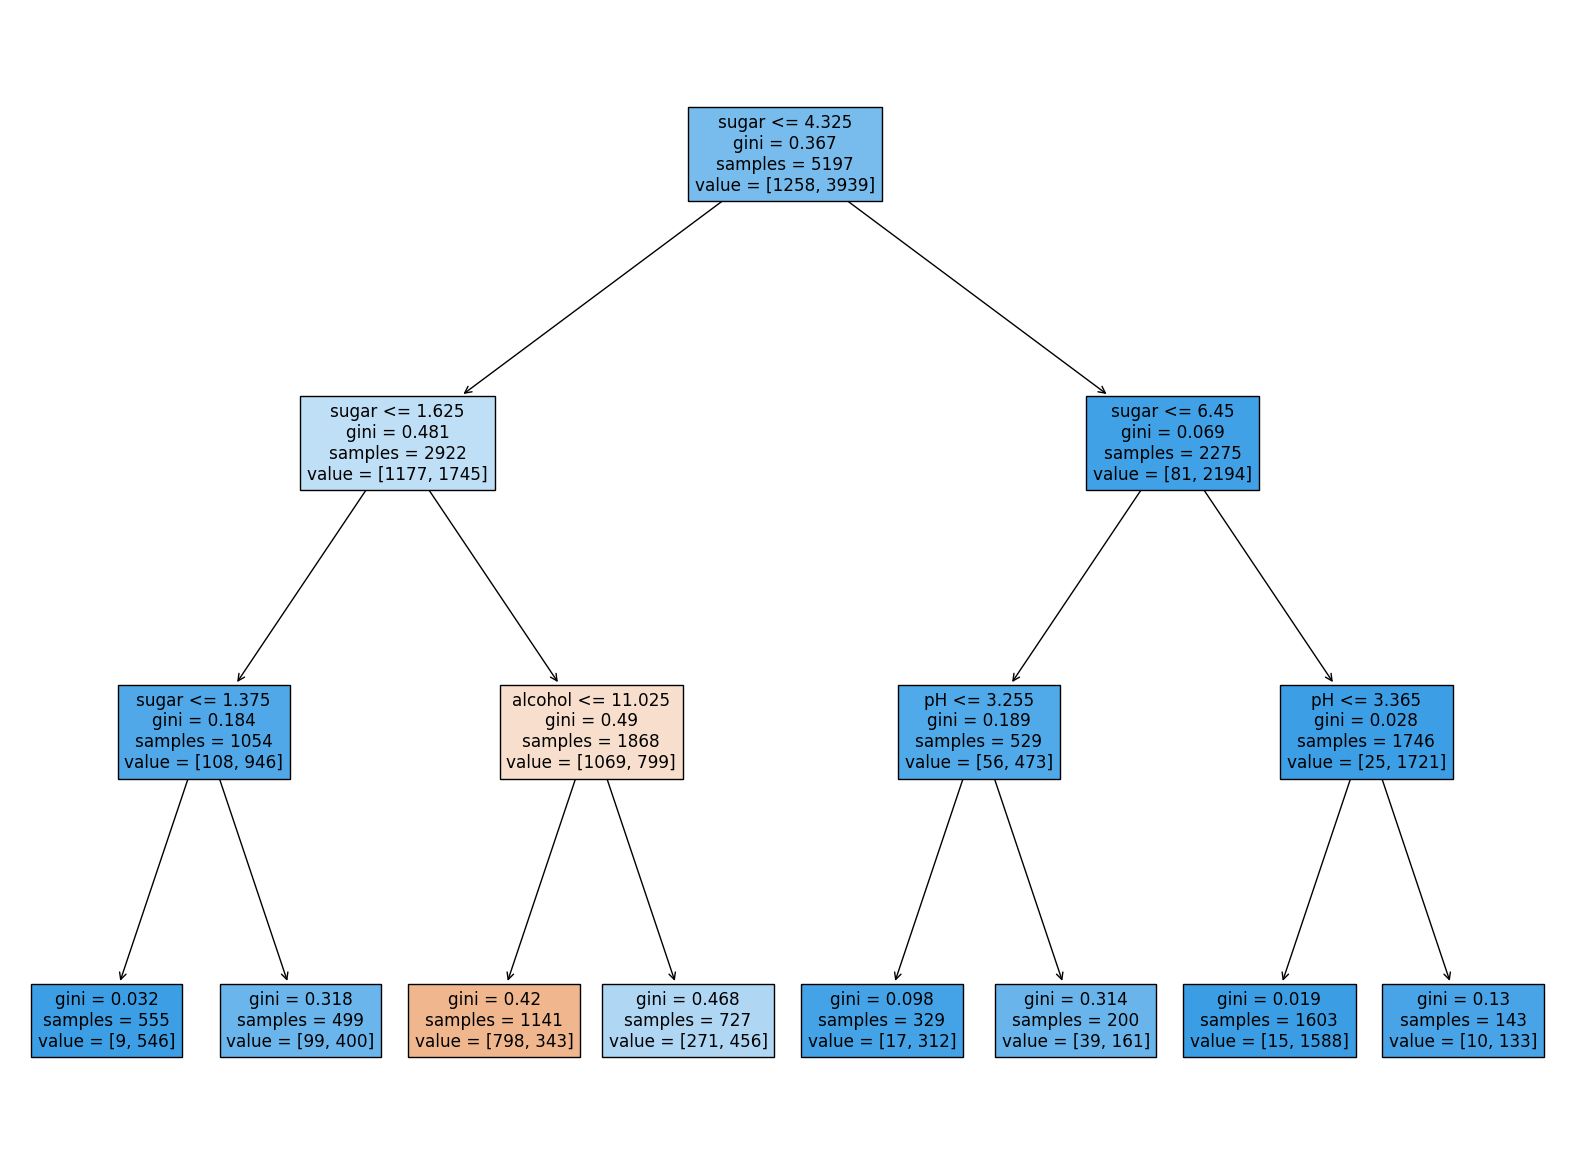

In [15]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=["alcohol", "sugar", "pH"])
plt.show()

In [16]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
